<p style = "font-size: 33px; line-height:lem">업비트 데이터와 볼린저 밴드를 이용한 코인 거래 수익 그래프화</p>

<p></p>

<p></p>

<p style = "font-size: 20px; line-height:lem">1.프로젝트 기획배경</p>

<p></p>

<p style = "font-size:18px">Python을 이용하여 과거 코인 호황기에 수익 시나리오를 통해 다시 다가올 코인열풍에 대비하는 인공지능 프로그램을 제작의 전초단계 준비</p>

***

<p></p>

<p style = "font-size: 20px; line-height:lem">2.프로젝트 내용</p>

<p></p>

<p style = "font-size: 15px; line-height:lem">업비트에서 도지코인(DOGE)과 이더리움클래식(ETC) 코인의 가격을 15분봉으로 가져와서 볼린저밴더 기술을 이용하여 인공지능으로 거래를 통해 수익율을 알아본다.</p>

<p style = "color = black">볼린저밴더는 20일 이동평균선, 표준편차 2 를 사용하였다.  </p>

<p></p>

In [1]:
# pyupbit 패키지 연결
import pyupbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

In [2]:
#비트코인 이더리움  현재 가격확인

tkrs = pyupbit.get_tickers(fiat='KRW')

current_prices = pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])
current_prices

{'KRW-BTC': 22948000, 'KRW-ETH': 1720500}

<p></p>

<p style = "font-size: 20px; line-height:lem"> 데이터 읽기</p>

<p></p>

In [3]:
#코인 종류 및 봉 길이 확인 
ticker = 'KRW-DOGE'
ticker_1 = 'KRW-ETC'
interval = 'minute15'
to = '2021-05-03 09:00'
count = 2500

In [4]:
# 한글폰트 설정, 그래프 마이너스 표시 설정

if platform.system() == 'Windows':
    
# 윈도우인 경우

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [5]:
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
#코인 과거 데이터 받아오기

df = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)  # 도지코인 데이터
df_1 = pyupbit.get_ohlcv(ticker=ticker_1,interval=interval,to=to,count=count)# 이더리움클래식 코인 데이터

In [7]:
df

,open,high,low,close,volume,value
2021-04-07 14:45:00,88.4,88.5,85.8,86.2,4.499158e+07,3.923436e+09
2021-04-07 15:00:00,86.2,87.5,85.5,86.2,4.270487e+07,3.697888e+09
2021-04-07 15:15:00,86.2,86.3,80.0,81.2,1.516294e+08,1.255720e+10
2021-04-07 15:30:00,81.2,83.9,81.0,82.0,8.848138e+07,7.300827e+09
2021-04-07 15:45:00,82.0,82.5,77.5,77.6,1.037300e+08,8.290109e+09
2021-04-07 16:00:00,77.6,82.5,60.0,76.6,3.336346e+08,2.402671e+10
2021-04-07 16:15:00,76.6,77.1,70.0,77.1,1.603775e+08,1.181135e+10
2021-04-07 16:30:00,77.1,77.8,73.6,76.7,1.001453e+08,7.555773e+09
2021-04-07 16:45:00,76.6,78.6,75.1,78.2,6.940568e+07,5.384684e+09
2021-04-07 17:00:00,78.2,82.0,75.6,77.1,1.064394e+08,8.417987e+09


<p></p>

<p style = "font-size: 20px; line-height:lem"> 볼린저밴더를 이용하여 업비트에서 가지고 온 도지코인, 이더리움클래식 코인 가격데이터 정제</p>

<p></p>

In [8]:
# 중심선, 상단밴드, 하단밴드 계산

#도지코인

df['ma20'] = df['close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:]

#이더리움클래식 코인

df_1['ma20'] = df_1['close'].rolling(window=20).mean() # 20일 이동평균
df_1['stddev'] = df_1['close'].rolling(window=20).std() # 20일 이동표준편차
df_1['upper'] = df_1['ma20'] + 2*df_1['stddev'] # 상단밴드
df_1['lower'] = df_1['ma20'] - 2*df_1['stddev'] # 하단밴드
df_1 = df_1[19:]


In [9]:
df

,open,high,low,close,volume,value,ma20,stddev,upper,lower
2021-04-07 19:30:00,76.6,77.5,76.4,76.8,2.513229e+07,1.933776e+09,77.720,3.608703,84.937406,70.502594
2021-04-07 19:45:00,76.7,77.6,75.7,75.9,2.494466e+07,1.908066e+09,77.205,3.022107,83.249214,71.160786
2021-04-07 20:00:00,75.8,76.9,75.6,76.3,1.779254e+07,1.356927e+09,76.710,2.158679,81.027358,72.392642
2021-04-07 20:15:00,76.4,76.8,74.8,75.8,2.812980e+07,2.133407e+09,76.440,1.888302,80.216604,72.663396
2021-04-07 20:30:00,75.7,75.8,73.0,73.0,4.605844e+07,3.419419e+09,75.990,1.532422,79.054843,72.925157
2021-04-07 20:45:00,73.0,75.0,72.6,73.2,5.343722e+07,3.910053e+09,75.770,1.603319,78.976638,72.563362
2021-04-07 21:00:00,73.1,73.4,68.6,68.6,1.156721e+08,8.182152e+09,75.370,2.252040,79.874080,70.865920
2021-04-07 21:15:00,68.6,72.5,67.6,70.6,1.006509e+08,7.064101e+09,75.045,2.449592,79.944184,70.145816
2021-04-07 21:30:00,70.6,73.6,70.5,73.0,6.958420e+07,5.047045e+09,74.860,2.457727,79.775454,69.944546
2021-04-07 21:45:00,73.0,74.7,71.6,74.5,3.976559e+07,2.905228e+09,74.675,2.328965,79.332930,70.017070


In [10]:
# action, state 컬럼만들기
trading_book = df.copy().assign(action='', state='').reset_index().rename(columns={'index':'date'})
trading_book_1 = df_1.copy().assign(action='', state='').reset_index().rename(columns={'index':'date'})
trading_book.head()


,date,open,high,low,close,volume,value,ma20,stddev,upper,lower,action,state
0,2021-04-07 19:30:00,76.6,77.5,76.4,76.8,2.513229e+07,1.933776e+09,77.720,3.608703,84.937406,70.502594,,
1,2021-04-07 19:45:00,76.7,77.6,75.7,75.9,2.494466e+07,1.908066e+09,77.205,3.022107,83.249214,71.160786,,
2,2021-04-07 20:00:00,75.8,76.9,75.6,76.3,1.779254e+07,1.356927e+09,76.710,2.158679,81.027358,72.392642,,
3,2021-04-07 20:15:00,76.4,76.8,74.8,75.8,2.812980e+07,2.133407e+09,76.440,1.888302,80.216604,72.663396,,
4,2021-04-07 20:30:00,75.7,75.8,73.0,73.0,4.605844e+07,3.419419e+09,75.990,1.532422,79.054843,72.925157,,


In [11]:
# 초기값 설정

init_money  =  2000000
init_count  =   0
fee = 0.05 # %
ratio = 0.01 * (100 - fee) 

 
for i in range(len(trading_book)):
    
    
    
    if i==0:
        trading_book.loc[i,'money']  = init_money
        trading_book.loc[i,'count']  = init_count
        # 종가가 하단밴드 이하이면 매수
        if trading_book.loc[i, 'close'] <= trading_book.loc[i, 'lower']:
            trading_book.loc[i, 'action'] = 'buy'
            trading_book.loc[i, 'state'] = 'holding'
            trading_book.loc[i,'count']  =   ratio * trading_book.loc[i,'money']   / trading_book.loc[i, 'close'] 
            trading_book.loc[i,'money']  =   0
        # 이외에는 아무것도 안하기
        else:
            trading_book.loc[i, 'action'] = ''
            trading_book.loc[i, 'state'] = ''
            
    else:
        # 종가가 하단밴드 이하인데
        if trading_book.loc[i, 'close'] <= trading_book.loc[i, 'lower']:
            # 이전상태가 보유중이 아니면 매수
            if trading_book.loc[i-1, 'state'] not in ['holding']:
                trading_book.loc[i, 'action'] = 'buy'
                trading_book.loc[i, 'state'] = 'holding'
                trading_book.loc[i,'count']  =   ratio * trading_book.loc[i-1,'money'] / trading_book.loc[i, 'close'] 
                trading_book.loc[i,'money']  =   0
                
            # 이전상태가 보유중이면 그대로 보유
            elif trading_book.loc[i-1, 'state'] in ['holding']:
                trading_book.loc[i, 'action'] = 'hold'
                trading_book.loc[i, 'state'] = 'holding'
                trading_book.loc[i,'count']  =  trading_book.loc[i-1,'count']
                trading_book.loc[i,'money']  =   trading_book.loc[i-1,'money']
                

        # 종가가 상단밴드 이상인데
        elif trading_book.loc[i, 'close'] >= trading_book.loc[i, 'upper']:
            # 이전상태가 보유중이 아니면 그대로 있기
            if trading_book.loc[i-1, 'state'] not in ['holding']:
                trading_book.loc[i, 'action'] = 'hold'
                trading_book.loc[i,'count']  =  trading_book.loc[i-1,'count']
                trading_book.loc[i,'money']  =   trading_book.loc[i-1,'money']
                
            # 이전상태가 보유중이면 매도
            elif trading_book.loc[i-1, 'state'] in ['holding']:
                trading_book.loc[i, 'action'] = 'sell'
                trading_book.loc[i, 'state'] = ''
                
                trading_book.loc[i,'money']  =   ratio * trading_book.loc[i-1,'count']  * trading_book.loc[i, 'close']
                trading_book.loc[i,'count']  =   0
                

        # 그 외에는 아무 행동도 하지 않고 상태는 이전상태 그대로 유지
        else:
            trading_book.loc[i, 'action'] = ''
            trading_book.loc[i, 'state'] = trading_book.loc[i-1]['state']
            trading_book.loc[i,'count']  =  trading_book.loc[i-1,'count']
            trading_book.loc[i,'money']  =   trading_book.loc[i-1,'money']
            
        trading_book.loc[i, 'val'] =  trading_book.loc[i,'money'] + ( trading_book.loc[i,'count'] * trading_book.loc[i, 'close'] )
        

for i in range(len(trading_book_1)):
    
    
    
    if i==0:
        trading_book_1.loc[i,'money']  = init_money
        trading_book_1.loc[i,'count']  = init_count
        # 종가가 하단밴드 이하이면 매수
        if trading_book_1.loc[i, 'close'] <= trading_book_1.loc[i, 'lower']:
            trading_book_1.loc[i, 'action'] = 'buy'
            trading_book_1.loc[i, 'state'] = 'holding'
            trading_book_1.loc[i,'count']  =   ratio * trading_book_1.loc[i,'money']   / trading_book_1.loc[i, 'close'] 
            trading_book_1.loc[i,'money']  =   0
        # 이외에는 아무것도 안하기
        else:
            trading_book_1.loc[i, 'action'] = ''
            trading_book_1.loc[i, 'state'] = ''
            
    else:
        # 종가가 하단밴드 이하인데
        if trading_book_1.loc[i, 'close'] <= trading_book_1.loc[i, 'lower']:
            # 이전상태가 보유중이 아니면 매수
            if trading_book_1.loc[i-1, 'state'] not in ['holding']:
                trading_book_1.loc[i, 'action'] = 'buy'
                trading_book_1.loc[i, 'state'] = 'holding'
                trading_book_1.loc[i,'count']  =   ratio * trading_book_1.loc[i-1,'money'] / trading_book_1.loc[i, 'close'] 
                trading_book_1.loc[i,'money']  =   0
                
            # 이전상태가 보유중이면 그대로 보유
            elif trading_book_1.loc[i-1, 'state'] in ['holding']:
                trading_book_1.loc[i, 'action'] = 'hold'
                trading_book_1.loc[i, 'state'] = 'holding'
                trading_book_1.loc[i,'count']  =  trading_book_1.loc[i-1,'count']
                trading_book_1.loc[i,'money']  =   trading_book_1.loc[i-1,'money']
                

        # 종가가 상단밴드 이상인데
        elif trading_book_1.loc[i, 'close'] >= trading_book_1.loc[i, 'upper']:
            # 이전상태가 보유중이 아니면 그대로 있기
            if trading_book_1.loc[i-1, 'state'] not in ['holding']:
                trading_book_1.loc[i, 'action'] = 'hold'
                trading_book_1.loc[i,'count']  =  trading_book_1.loc[i-1,'count']
                trading_book_1.loc[i,'money']  =   trading_book_1.loc[i-1,'money']
                
            # 이전상태가 보유중이면 매도
            elif trading_book_1.loc[i-1, 'state'] in ['holding']:
                trading_book_1.loc[i, 'action'] = 'sell'
                trading_book_1.loc[i, 'state'] = ''
                
                trading_book_1.loc[i,'money']  =   ratio * trading_book_1.loc[i-1,'count']  * trading_book_1.loc[i, 'close']
                trading_book_1.loc[i,'count']  =   0
                

        # 그 외에는 아무 행동도 하지 않고 상태는 이전상태 그대로 유지
        else:
            trading_book_1.loc[i, 'action'] = ''
            trading_book_1.loc[i, 'state'] = trading_book_1.loc[i-1]['state']
            trading_book_1.loc[i,'count']  =  trading_book_1.loc[i-1,'count']
            trading_book_1.loc[i,'money']  =   trading_book_1.loc[i-1,'money']
            
        trading_book_1.loc[i, 'val'] =  trading_book_1.loc[i,'money'] + ( trading_book_1.loc[i,'count'] * trading_book_1.loc[i, 'close'] )
        
        
        
        
        
        

In [12]:
# 매도 매수 데이터 정리하기

report = trading_book.loc[trading_book['action'].isin(['buy', 'sell']), [ 'date','close', 'upper', 'lower', 'action', 'state', 'money','count','val']].reset_index(drop=True)
report_1 = trading_book_1.loc[trading_book_1['action'].isin(['buy', 'sell']), [ 'date','close', 'upper', 'lower', 'action', 'state', 'money','count','val']].reset_index(drop=True)
report

,date,close,upper,lower,action,state,money,count,val
0,2021-04-07 21:00:00,68.6,79.874080,70.865920,buy,holding,0.000000e+00,29139.941691,1.999000e+06
1,2021-04-08 07:00:00,78.5,77.789635,75.210365,sell,,2.286342e+06,0.000000,2.286342e+06
2,2021-04-08 12:00:00,76.0,79.251015,76.028985,buy,holding,0.000000e+00,30068.401437,2.285199e+06
3,2021-04-08 17:15:00,78.3,78.230967,75.959033,sell,,2.353179e+06,0.000000,2.353179e+06
4,2021-04-09 04:45:00,78.2,79.193458,78.366542,buy,holding,0.000000e+00,30076.752753,2.352002e+06
5,2021-04-09 06:15:00,79.4,79.226031,78.183969,sell,,2.386900e+06,0.000000,2.386900e+06
6,2021-04-09 10:15:00,77.9,81.321432,77.978568,buy,holding,0.000000e+00,30625.246103,2.385707e+06
7,2021-04-09 16:30:00,81.4,80.319777,77.890223,sell,,2.491649e+06,0.000000,2.491649e+06
8,2021-04-09 23:15:00,79.3,81.276600,79.343400,buy,holding,0.000000e+00,31404.826746,2.490403e+06
9,2021-04-10 06:15:00,81.2,80.954408,79.845592,sell,,2.548797e+06,0.000000,2.548797e+06


In [13]:
report = report.assign(buy_price=report['close'].shift(1))
report_1 = report_1.assign(buy_price=report_1['close'].shift(1))
report

,date,close,upper,lower,action,state,money,count,val,buy_price
0,2021-04-07 21:00:00,68.6,79.874080,70.865920,buy,holding,0.000000e+00,29139.941691,1.999000e+06,NaN
1,2021-04-08 07:00:00,78.5,77.789635,75.210365,sell,,2.286342e+06,0.000000,2.286342e+06,68.6
2,2021-04-08 12:00:00,76.0,79.251015,76.028985,buy,holding,0.000000e+00,30068.401437,2.285199e+06,78.5
3,2021-04-08 17:15:00,78.3,78.230967,75.959033,sell,,2.353179e+06,0.000000,2.353179e+06,76.0
4,2021-04-09 04:45:00,78.2,79.193458,78.366542,buy,holding,0.000000e+00,30076.752753,2.352002e+06,78.3
5,2021-04-09 06:15:00,79.4,79.226031,78.183969,sell,,2.386900e+06,0.000000,2.386900e+06,78.2
6,2021-04-09 10:15:00,77.9,81.321432,77.978568,buy,holding,0.000000e+00,30625.246103,2.385707e+06,79.4
7,2021-04-09 16:30:00,81.4,80.319777,77.890223,sell,,2.491649e+06,0.000000,2.491649e+06,77.9
8,2021-04-09 23:15:00,79.3,81.276600,79.343400,buy,holding,0.000000e+00,31404.826746,2.490403e+06,81.4
9,2021-04-10 06:15:00,81.2,80.954408,79.845592,sell,,2.548797e+06,0.000000,2.548797e+06,79.3


In [14]:
# 매도, 매수시 이익률과 Seed Money 데이터 정리하기

report.loc[~report['action'].isin(['sell']), 'buy_price'] = np.nan
report_1.loc[~report['action'].isin(['sell']), 'buy_price'] = np.nan
report

,date,close,upper,lower,action,state,money,count,val,buy_price
0,2021-04-07 21:00:00,68.6,79.874080,70.865920,buy,holding,0.000000e+00,29139.941691,1.999000e+06,NaN
1,2021-04-08 07:00:00,78.5,77.789635,75.210365,sell,,2.286342e+06,0.000000,2.286342e+06,68.6
2,2021-04-08 12:00:00,76.0,79.251015,76.028985,buy,holding,0.000000e+00,30068.401437,2.285199e+06,NaN
3,2021-04-08 17:15:00,78.3,78.230967,75.959033,sell,,2.353179e+06,0.000000,2.353179e+06,76.0
4,2021-04-09 04:45:00,78.2,79.193458,78.366542,buy,holding,0.000000e+00,30076.752753,2.352002e+06,NaN
5,2021-04-09 06:15:00,79.4,79.226031,78.183969,sell,,2.386900e+06,0.000000,2.386900e+06,78.2
6,2021-04-09 10:15:00,77.9,81.321432,77.978568,buy,holding,0.000000e+00,30625.246103,2.385707e+06,NaN
7,2021-04-09 16:30:00,81.4,80.319777,77.890223,sell,,2.491649e+06,0.000000,2.491649e+06,77.9
8,2021-04-09 23:15:00,79.3,81.276600,79.343400,buy,holding,0.000000e+00,31404.826746,2.490403e+06,NaN
9,2021-04-10 06:15:00,81.2,80.954408,79.845592,sell,,2.548797e+06,0.000000,2.548797e+06,79.3


In [15]:
report.loc[report['action'].isin(['sell']), 'yield(%)'] = round((report['close']/report['buy_price']-1)*100, 2)
report_1.loc[report_1['action'].isin(['sell']), 'yield(%)'] = round((report_1['close']/report_1['buy_price']-1)*100, 2)
report

,date,close,upper,lower,action,state,money,count,val,buy_price,yield(%)
0,2021-04-07 21:00:00,68.6,79.874080,70.865920,buy,holding,0.000000e+00,29139.941691,1.999000e+06,NaN,NaN
1,2021-04-08 07:00:00,78.5,77.789635,75.210365,sell,,2.286342e+06,0.000000,2.286342e+06,68.6,14.43
2,2021-04-08 12:00:00,76.0,79.251015,76.028985,buy,holding,0.000000e+00,30068.401437,2.285199e+06,NaN,NaN
3,2021-04-08 17:15:00,78.3,78.230967,75.959033,sell,,2.353179e+06,0.000000,2.353179e+06,76.0,3.03
4,2021-04-09 04:45:00,78.2,79.193458,78.366542,buy,holding,0.000000e+00,30076.752753,2.352002e+06,NaN,NaN
5,2021-04-09 06:15:00,79.4,79.226031,78.183969,sell,,2.386900e+06,0.000000,2.386900e+06,78.2,1.53
6,2021-04-09 10:15:00,77.9,81.321432,77.978568,buy,holding,0.000000e+00,30625.246103,2.385707e+06,NaN,NaN
7,2021-04-09 16:30:00,81.4,80.319777,77.890223,sell,,2.491649e+06,0.000000,2.491649e+06,77.9,4.49
8,2021-04-09 23:15:00,79.3,81.276600,79.343400,buy,holding,0.000000e+00,31404.826746,2.490403e+06,NaN,NaN
9,2021-04-10 06:15:00,81.2,80.954408,79.845592,sell,,2.548797e+06,0.000000,2.548797e+06,79.3,2.40


<p></p>

<p style = "font-size: 20px; line-height:lem">도지코인 볼린저밴더 데이터시각화 </p>

<p></p>

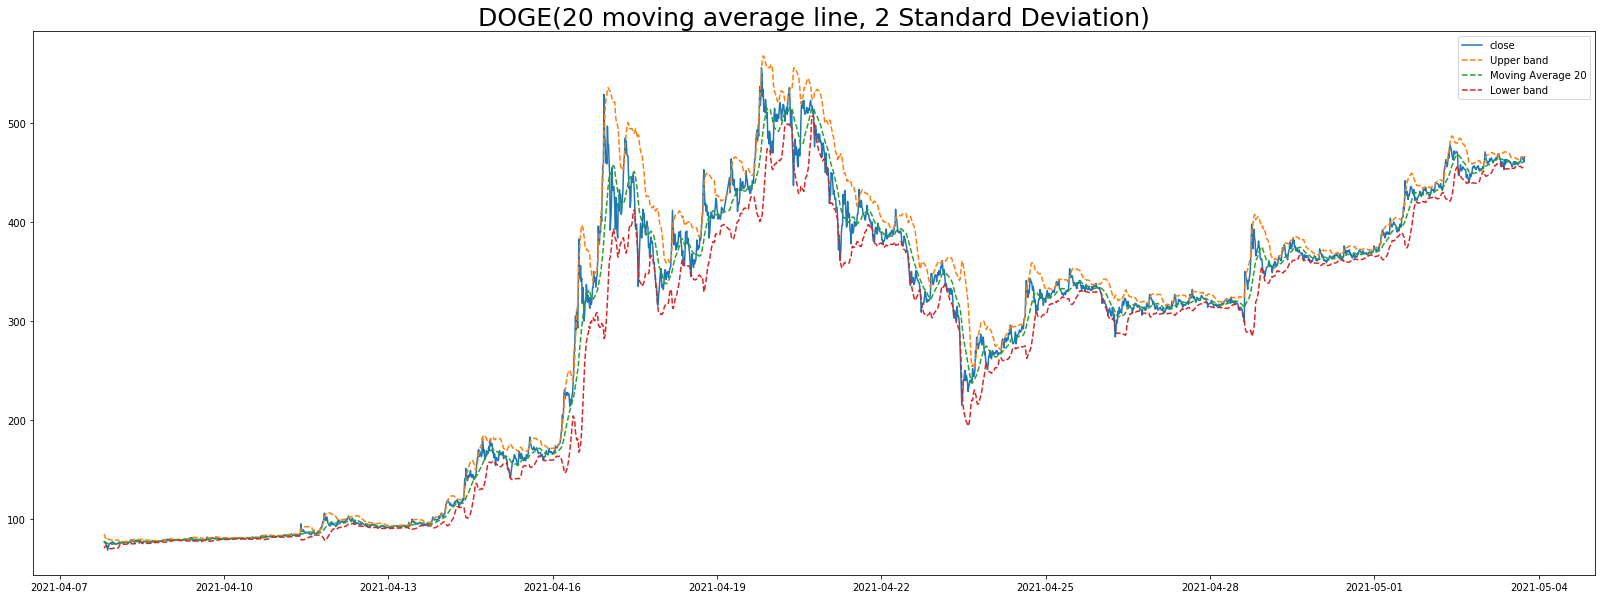

In [16]:
#도지코인 볼린저밴더 지표 그래프화

plt.figure(figsize=(28, 10))
plt.plot(df.index, df['close'], label='close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{"DOGE"}(20 moving average line, 2 Standard Deviation)', fontsize=25)
plt.legend(loc='best');

<p></p>

<p style = "font-size: 20px; line-height:lem">Seed Money 데이터시각화 </p>

<p></p>

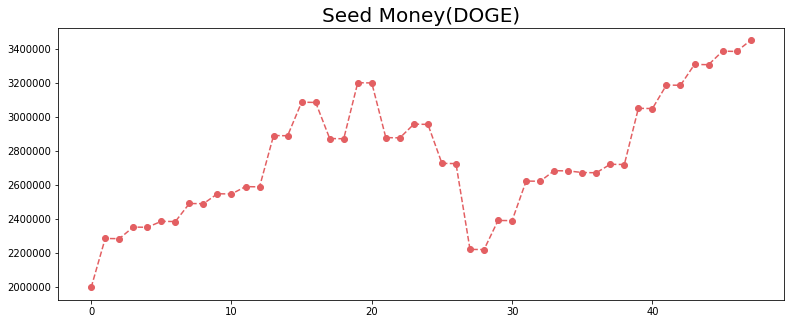

In [22]:
# Seed Money 변화 그래프화

plt.figure(figsize=(13, 5))
plt.plot(report.index, report['val'], color='#e35f62', marker='o',linestyle='--')
plt.title(f'Seed Money(DOGE)', fontsize=20)
plt.show()

<p></p>

---

<p></p>

<p style = "font-size: 20px; line-height:lem">이더리움클래식 코인 볼린저밴더 데이터시각화 </p>

<p></p>

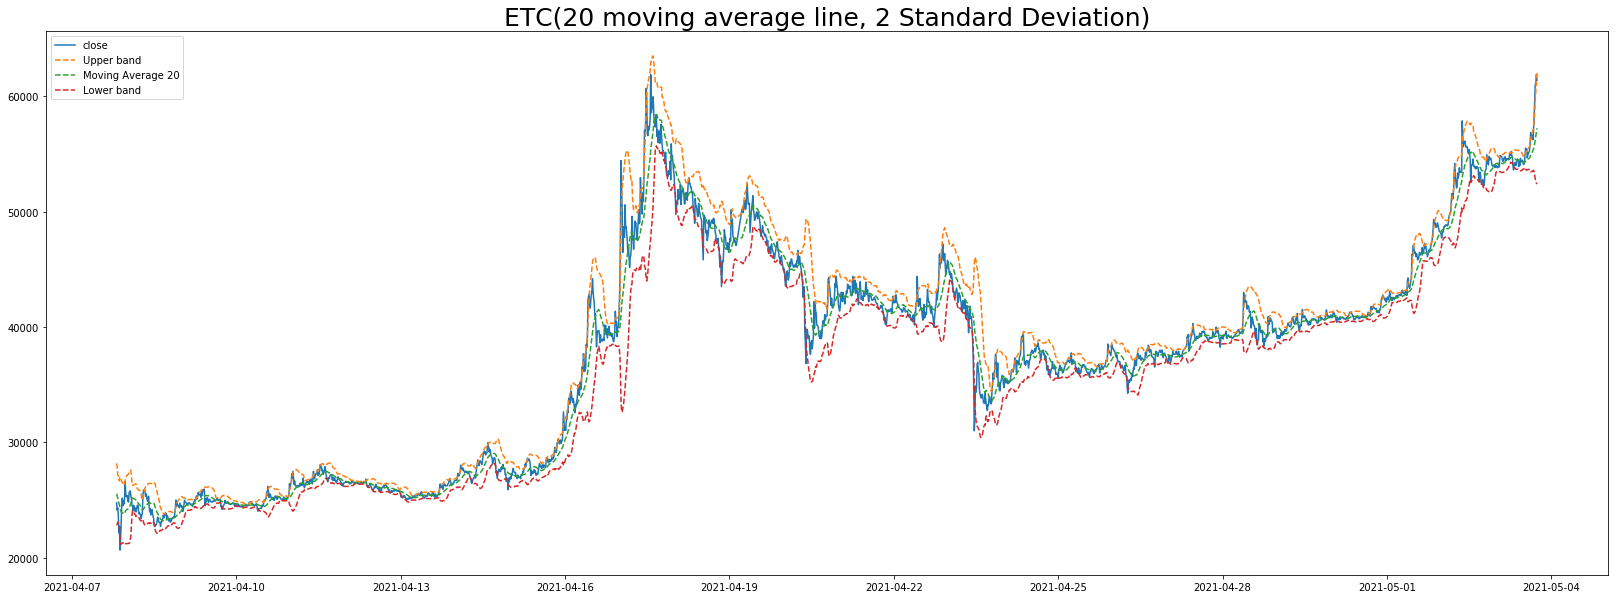

In [20]:
#이더리움클래식 코인 볼린저밴더 지표 그래프화

plt.figure(figsize=(28, 10))
plt.plot(df_1.index, df_1['close'], label='close')
plt.plot(df_1.index, df_1['upper'], linestyle='dashed', label='Upper band')
plt.plot(df_1.index, df_1['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df_1.index, df_1['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{"ETC"}(20 moving average line, 2 Standard Deviation)', fontsize=25)
plt.legend(loc='best');

<p></p>

<p style = "font-size: 20px; line-height:lem">Seed Money 데이터시각화 </p>

<p></p>

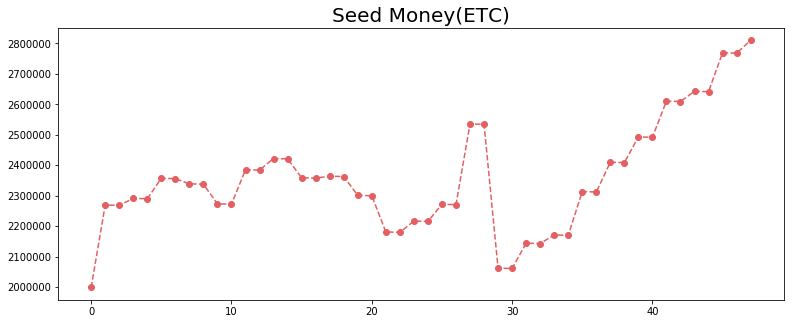

In [23]:
# Seed Money 변화 그래프화

plt.figure(figsize=(13, 5))
plt.plot(report_1.index, report_1['val'], color='#e35f62', marker='o',linestyle='--')
plt.title(f'Seed Money(ETC)', fontsize=20)
plt.show()

<p></p>

<p style = "font-size: 15px; line-height:lem"> 총 2개의 코인을 볼린저밴더 기술을 이용하여 인공지능 거래시 각각 200만원에서 시작하여 140만원, 80만원의 수익을 올렸다. </p>

<p></p>

<p></p>

---

<p style = "font-size: 20px; line-height:lem"> 3.프로젝트 발전 가능성 </p>

<p></p>

<p style = "font-size: 15px; line-height:lem">위에서 구현한 방법이 정답이라고 할 수 없다. 볼린저밴더 아래라고 해서 저점이라고 할수도 없고, 상단밴드 위라고 해서 고점이라고 볼 수도 없다.</p>

<p style = "font-size: 15px; line-height:lem">추후 자동으로 업비트를 통해 매도 매수 관련 접근 코드를 업데이트, 1분봉을 통해 거래하기 위해 수용할 수 있는 서버 필요 예상 된다. </p>

<p style = "font-size: 15px; line-height:lem"> 추세를 확증할 수 있는 다른 보조지표 함께 사용하는 방법을 업데이트 하도록 한다. </p>

<p style = "font-size: 15px"> 이동평균선과 표준편차를 조절하여 더 많은 수익을 낼 수 있는 보조 프로그램 개발 필요하다. </p>

---

<p style = "font-size: 20px; line-height:lem">4.프로젝트 후기</p>

<p style = "font-size: 15px; line-height:lem"> 관심있는 분야에 인공지능을 접목시켜서 프로젝트를 만드는 동안 굉장히 재밌었다. 여기서 멈추지 않고 실제로 적용할 수 있는 프로그램을 만들어서 다시 올 코인 호황기를 준비하겠다. ^^</p>